In [1]:
import sys
sys.path.append('../lib')
from simulations import simulate_trajectory
from models import G_Maxwell, G_Kelvin_Voigt, G_fractional_Kelvin_Voigt, PSD
from analyze_data import get_peak_indices, initial_guess_maxwell, initial_guess_kelvin_voigt, initial_guess_fractional_kelvin_voigt, fit_maxwell, fit_kelvin_voigt, fit_fractional_kelvin_voigt
import matplotlib.pyplot as plt
import numpy as np
from data_handeling import Data

In [2]:
x_data = np.load("../data/Hydrogel_25_khz_x.npy")
#x_data = np.load("../data/tweezeramplitude_000_x_66_kHz.npy")
#make t-data under the assumption that measurements are taken at 1 kHz
t_data = np.linspace(0, len(x_data)/1000, len(x_data))

data = Data(t_data, x_data, typical_peak_number=1, max_peak_percentage=.9)
data.create_PSD()
data.bayesian_update()

c:\Users\jschulz\Desktop\Git_file\mbr_relevant_code\Spectra_cleaning\demos\../lib\analyze_data.py:35: RuntimeWarning: invalid value encountered in log
  Loss = y_data / y_model + np.log(y_model)


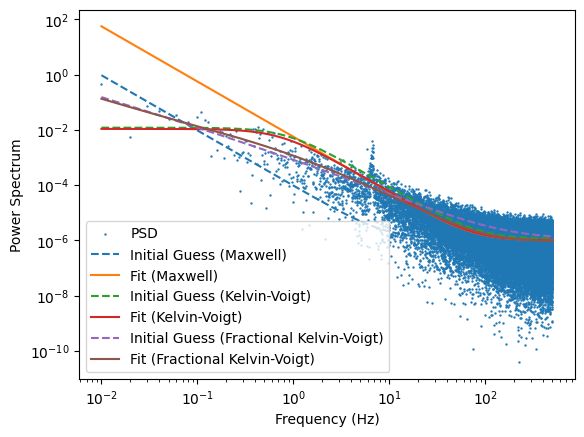

In [3]:
data.plot_psd()

In [4]:
print(data.posterior_maxwell)
print(data.posterior_kelvin_voigt)
print(data.posterior_fractional_kelvin_voigt)

5.243497821316218e-193
8.799567649951814e-149
1.0


In [14]:
data.peaks = []
data.max_peak_percentage = .8
data.find_peaks(max_iter=5)

c:\Users\jschulz\Desktop\Git_file\mbr_relevant_code\Spectra_cleaning\demos\../lib\analyze_data.py:35: RuntimeWarning: invalid value encountered in log
  Loss = y_data / y_model + np.log(y_model)


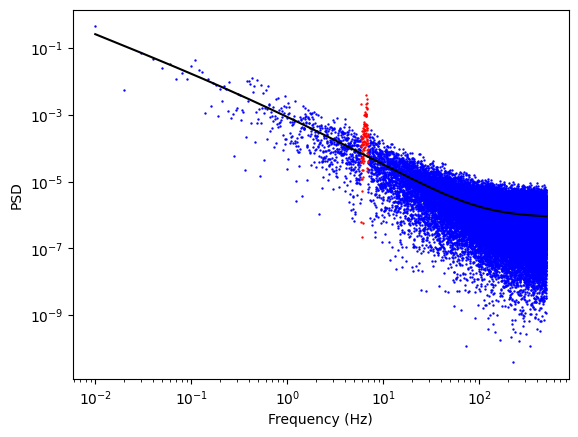

In [15]:
frequencies = data.frequencies
PSD = data.PSD
peak_idx = get_peak_indices(data.peaks)
non_peak_idx = np.setdiff1d(np.arange(len(frequencies)), peak_idx)
plt.scatter(frequencies[non_peak_idx], PSD[non_peak_idx], s=.5,c='b', label='Hydrogel 1 kHz')
plt.scatter(frequencies[peak_idx], PSD[peak_idx], s=.5,c='r')
plt.plot(frequencies, data.fit_function(frequencies, data.fit_params), c='k')

plt.xscale('log')
plt.yscale('log')
plt.xlabel("Frequency (Hz)")
plt.ylabel("PSD")
plt.show()


In [9]:
data.fit_params 


array([9.61237043e+02, 5.91646983e+02, 6.04982811e-01, 1.79025243e-01,
       8.41468089e-07])